In [68]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.ensemble import IsolationForest

In [2]:
input_file = 'star_dataset/6_class_csv.csv'
data_wt_label=pd.read_csv(input_file, header = 0)
data_wt_label.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
### Shuffle and reset index ###
data_wt_label = data_wt_label.sample(frac=1, random_state=0)
data_wt_label = data_wt_label.reset_index(drop=True)

In [4]:
data_wt_label.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,33421,352000.000,67.000,-5.79,4,Blue,O
1,3607,0.022,0.380,10.12,1,Red,M
2,6380,1.350,0.980,2.93,3,yellow-white,F
3,3550,0.004,0.291,10.89,1,Red,M
4,24345,142000.000,57.000,-6.24,4,Blue,O


In [5]:
### Missing values in each column ###
data_wt_label.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [6]:
data_wt_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [7]:
data_wt_label.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [8]:
### checking for class imbalance ###
data_wt_label['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

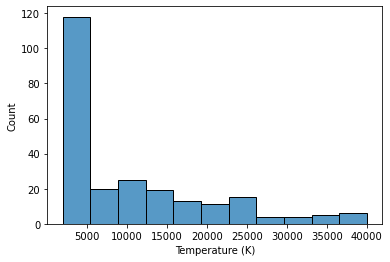

In [9]:
#Histogram of all features
sns.histplot(data_wt_label["Temperature (K)"])
plt.show()

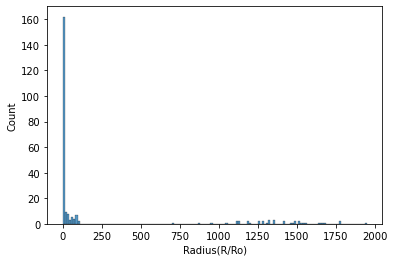

In [10]:
sns.histplot(data_wt_label["Radius(R/Ro)"])
plt.show()

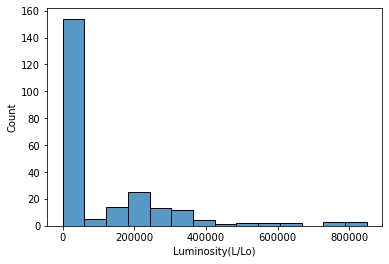

In [11]:
sns.histplot(data_wt_label["Luminosity(L/Lo)"])
plt.show()

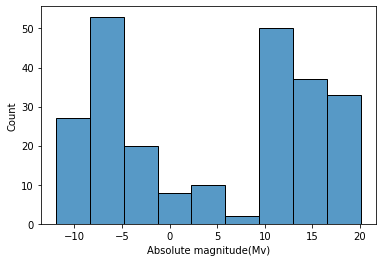

In [12]:
sns.histplot(data_wt_label["Absolute magnitude(Mv)"])
plt.show()

In [13]:
#data_wt_label.hist(figsize=(15,12),bins = 15)
#plt.title("Features Distribution")
#plt.show()

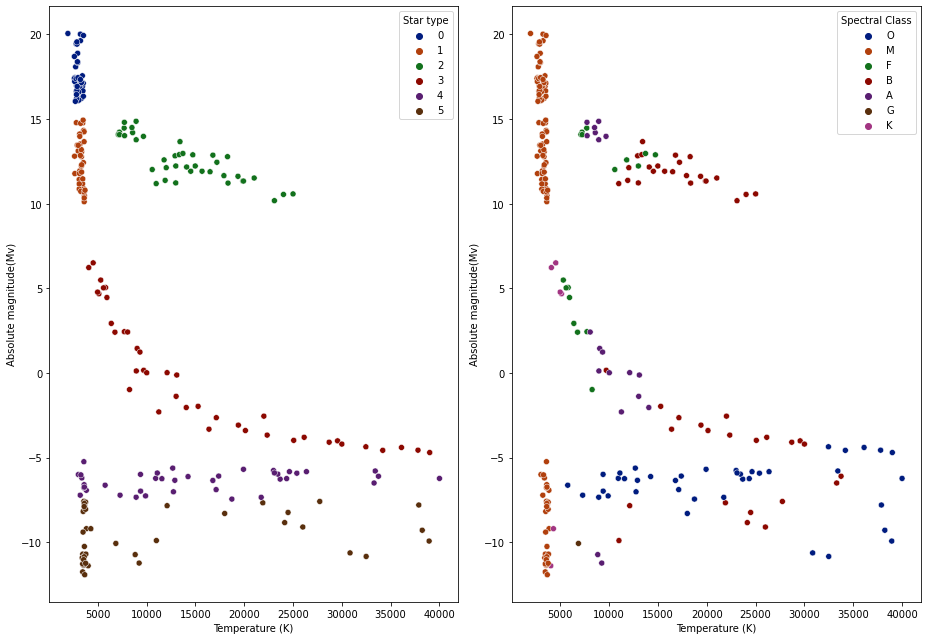

In [14]:
### visualize HR-diagram with our data ###
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=data_wt_label,hue='Star type',ax=ax[0],palette='dark')
sns.scatterplot(x='Temperature (K)',y='Absolute magnitude(Mv)',data=data_wt_label,hue='Spectral Class',ax=ax[1],palette='dark')
plt.tight_layout()
plt.show()

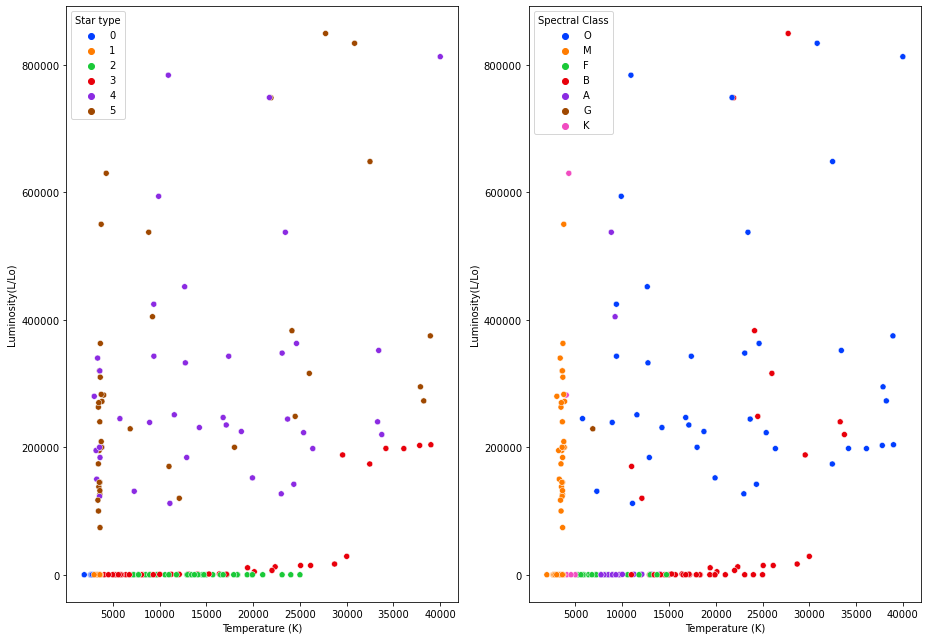

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,9))
sns.scatterplot(x='Temperature (K)',y='Luminosity(L/Lo)',data=data_wt_label,hue='Star type',ax=ax[0],palette='bright')
sns.scatterplot(x='Temperature (K)',y='Luminosity(L/Lo)',data=data_wt_label,hue='Spectral Class',ax=ax[1],palette='bright')
plt.tight_layout()
plt.show()

In [16]:
data_wt_label

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,33421,352000.00000,67.0000,-5.79,4,Blue,O
1,3607,0.02200,0.3800,10.12,1,Red,M
2,6380,1.35000,0.9800,2.93,3,yellow-white,F
3,3550,0.00400,0.2910,10.89,1,Red,M
4,24345,142000.00000,57.0000,-6.24,4,Blue,O
...,...,...,...,...,...,...,...
235,2817,0.00098,0.0911,16.45,0,Red,M
236,2994,0.00720,0.2800,13.45,1,Red,M
237,3625,74000.00000,876.0000,-10.25,5,Red,M
238,3574,200000.00000,89.0000,-5.24,4,Red,M


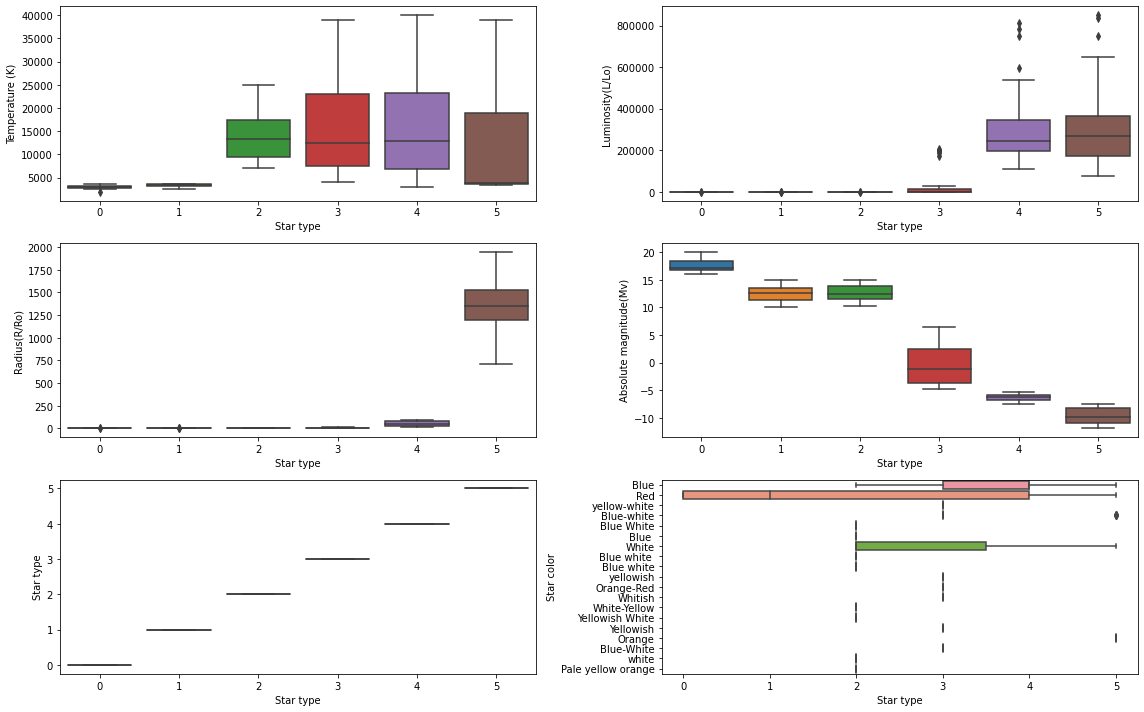

In [17]:
fig,ax = plt.subplots(nrows = 3, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(data_wt_label.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data_wt_label["Star type"], y = data_wt_label[data_wt_label.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

#### Target [Star Type]
Brown Dwarf -> Star Type = 0 \
Red Dwarf -> Star Type = 1 \
White Dwarf-> Star Type = 2 \
Main Sequence -> Star Type = 3 \
Supergiant -> Star Type = 4 \
Hypergiant -> Star Type = 5

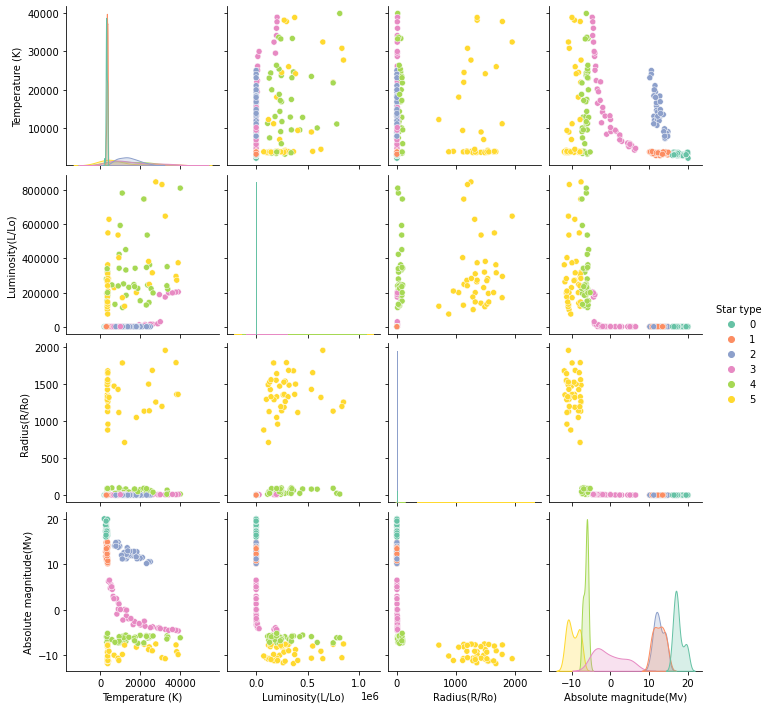

In [18]:
sns.pairplot(data=data_wt_label,hue="Star type",palette="Set2")
plt.show()

In [19]:
### Split dataframe into categorical and numeric features ### 
df_cat = data_wt_label.select_dtypes(exclude=np.number)
df_num = data_wt_label.select_dtypes(include=np.number)

In [20]:
df_cat.head(2)

,Star color,Spectral Class
0,Blue,O
1,Red,M


In [21]:
df_num.head(2)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
0,33421,352000.000,67.00,-5.79,4
1,3607,0.022,0.38,10.12,1


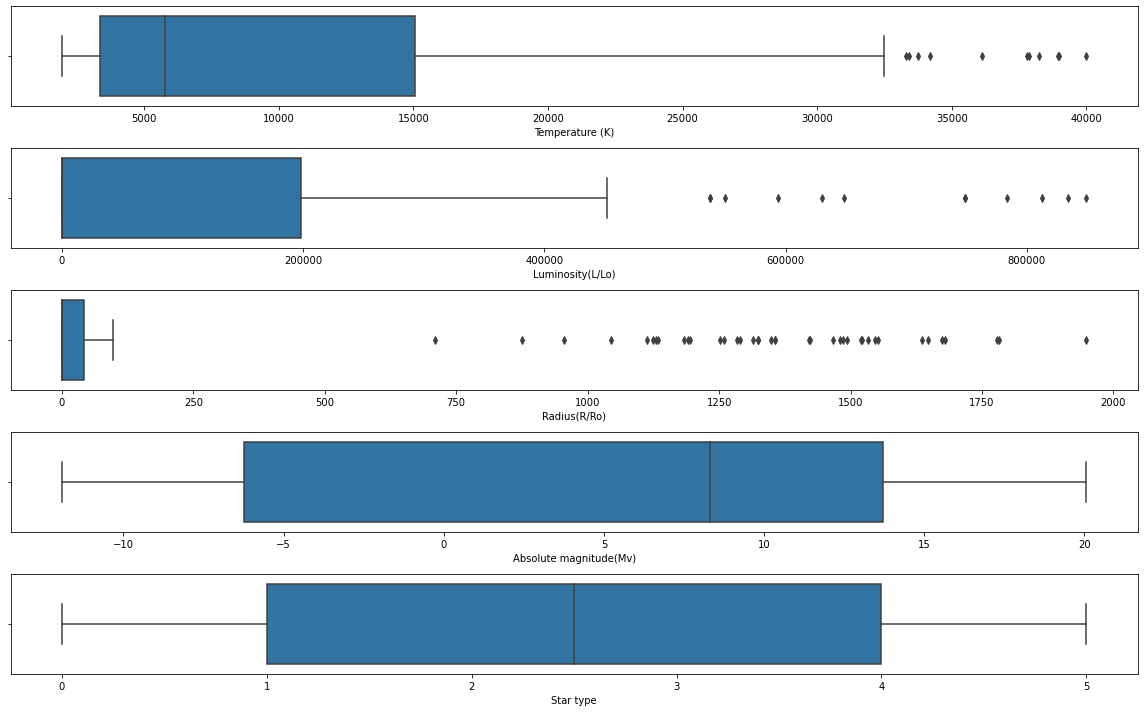

In [22]:
### visualizing outliers ###
fig,ax=plt.subplots(len(df_num.columns),figsize=(16,10))
for i in range(len(df_num.columns)):
    sns.boxplot(x = df_num.iloc[:,i],ax=ax[i],hue=data_wt_label['Star type'])
    plt.tight_layout()
plt.show()

In [23]:
### Removing labels ###
target = df_num['Star type'].to_numpy()
df_num = df_num.drop('Star type',axis=1)
df_num.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,33421,352000.000,67.000,-5.79
1,3607,0.022,0.380,10.12
2,6380,1.350,0.980,2.93
3,3550,0.004,0.291,10.89
4,24345,142000.000,57.000,-6.24


In [24]:
### Labels for reference ###
target[:10]

array([4, 1, 3, 1, 4, 4, 3, 4, 3, 1], dtype=int64)

In [25]:
### Scaling of features ###
scaler = StandardScaler()
df_scaled_num = pd.DataFrame(scaler.fit_transform(df_num),columns = df_num.columns)
df_scaled_num.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,2.404776,1.367219,-0.329714,-0.967827
1,-0.722839,-0.598623,-0.458803,0.545890
2,-0.431939,-0.598616,-0.457640,-0.138185
3,-0.728818,-0.598624,-0.458975,0.619150
4,1.452665,0.194415,-0.349091,-1.010642


In [26]:
### Encoding categorical variables ###
encoded_cat=pd.get_dummies(df_cat,drop_first=True)
encoded_cat.head()

,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
### Combining scaled numeric variables and encoded categorical variables ###
#df = pd.concat([encoded_cat,df_scaled_num],axis=1)
df_scaled = pd.concat([encoded_cat,df_scaled_num],axis=1)
df_scaled_matrix = df_scaled.values
print("Scaled Data matrix shape: ",df_scaled_matrix.shape)
df_scaled.head()

Scaled Data matrix shape:  (240, 28)


,Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,Star color_Orange,Star color_Orange-Red,Star color_Pale yellow orange,Star color_Red,...,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2.404776,1.367219,-0.329714,-0.967827
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.722839,-0.598623,-0.458803,0.545890
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,-0.431939,-0.598616,-0.457640,-0.138185
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,-0.728818,-0.598624,-0.458975,0.619150
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1.452665,0.194415,-0.349091,-1.010642


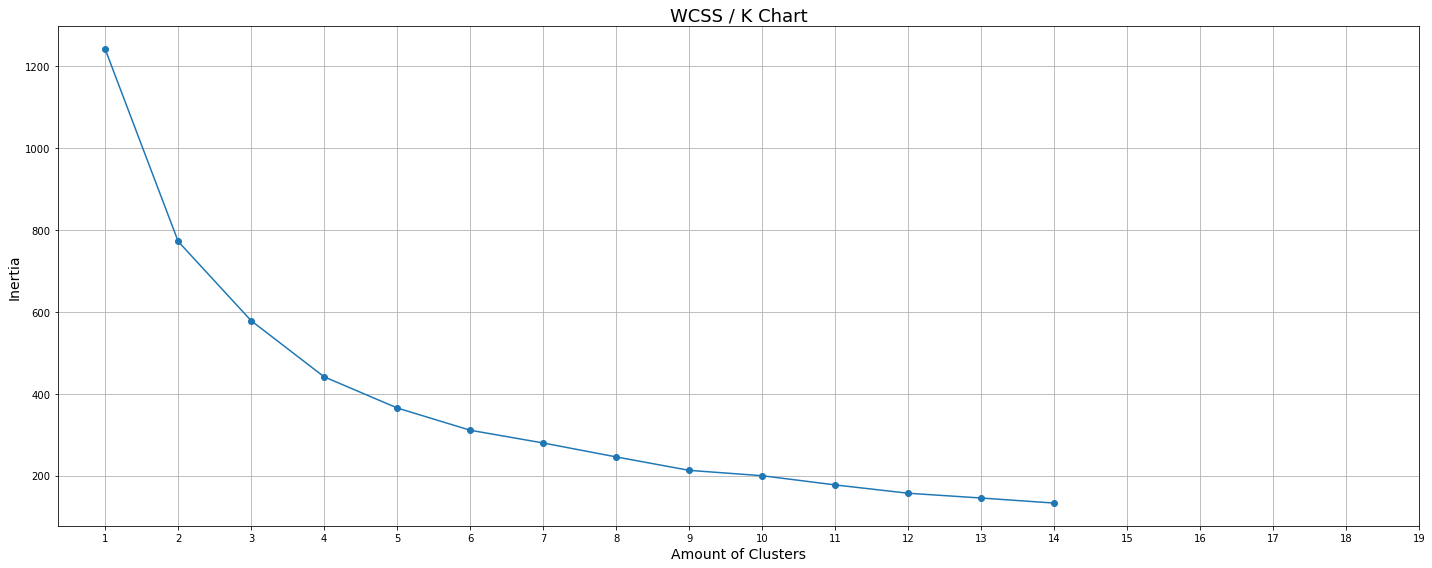

In [28]:
### K-means on scaled dataset ###
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0,max_iter=600, algorithm ='auto')
    kmeans.fit(df_scaled_matrix)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [29]:
### K-means with 6 clusters ### 
kmeans = KMeans(n_clusters=6, random_state=0, max_iter=600, algorithm = 'auto')
#kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
kmeans.fit(df_scaled_matrix)
centroids = kmeans.cluster_centers_
km_labels = kmeans.labels_

correct = 0
for i in range(len(df_scaled_matrix)):
    predict_me = np.array(df_scaled_matrix[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == target[i]:
        correct += 1
print(correct/len(df_scaled_matrix))

0.20833333333333334


In [30]:
### PCA with 3 components ### 
pca = PCA(n_components=3,random_state=0)
x_pca = pca.fit_transform(df_scaled_matrix)
print("Dimensionality Reduced features: ",x_pca.shape)
print("X scaled features: ",df_scaled.shape)
df_pca3 = pd.DataFrame()
df_pca3['pca-one'] = x_pca[:,0]
df_pca3['pca-two'] = x_pca[:,1] 
df_pca3['pca-three'] = x_pca[:,2]
df_pca3['label'] = data_wt_label['Star type']
print("Dimensionality Reduced features with label: ",df_pca3.shape)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Dimensionality Reduced features:  (240, 3)
X scaled features:  (240, 28)
Dimensionality Reduced features with label:  (240, 4)
Explained variation per principal component: [0.49183237 0.23838117 0.0853286 ]


[Text(0.5, 1.0, 'PCA-ONE Vs PCA-TWO')]

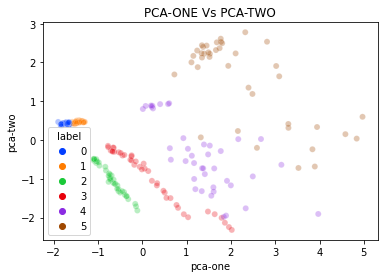

In [31]:
### PCA 2-D plot ###
#plt.figure(figsize=(16,10))
plt.figure()
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    #palette=sns.color_palette("hls", 10),
    palette=sns.color_palette("bright", 6),
    data=df_pca3.loc[:,:],
    legend="full",
    alpha=0.3
).set(title="PCA-ONE Vs PCA-TWO")

[Text(0.5, 1.0, 'PCA-TWO Vs PCA-THREE')]

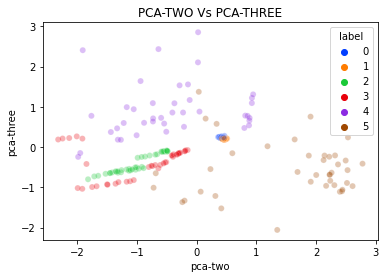

In [32]:
#plt.figure(figsize=(16,10))
plt.figure()
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="label",
    #palette=sns.color_palette("hls", 10),
    palette=sns.color_palette("bright", 6),
    data=df_pca3.loc[:,:],
    legend="full",
    alpha=0.3
).set(title="PCA-TWO Vs PCA-THREE")

[Text(0.5, 1.0, 'PCA-ONE Vs PCA-THREE')]

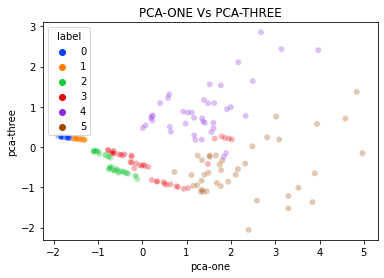

In [33]:
#plt.figure(figsize=(16,10))
plt.figure()
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="label",
    #palette=sns.color_palette("hls", 10),
    palette=sns.color_palette("bright", 6),
    data=df_pca3.loc[:,:],
    legend="full",
    alpha=0.3
).set(title="PCA-ONE Vs PCA-THREE")

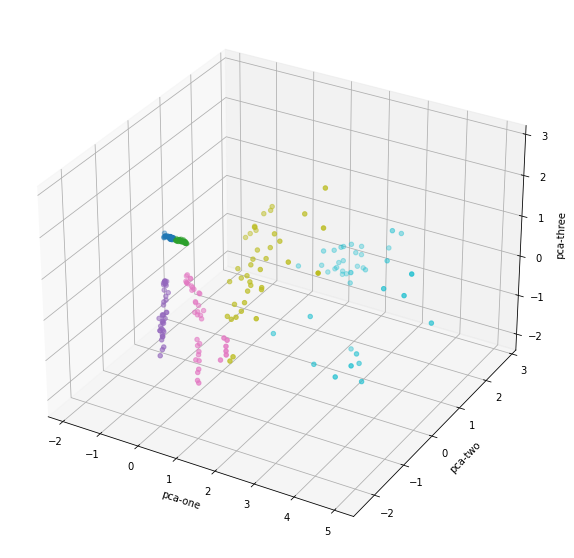

In [34]:
### PCA 3-D plot ###
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_pca3.loc[:,:]["pca-one"], 
    ys=df_pca3.loc[:,:]["pca-two"], 
    zs=df_pca3.loc[:,:]["pca-three"], 
    c=df_pca3.loc[:,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

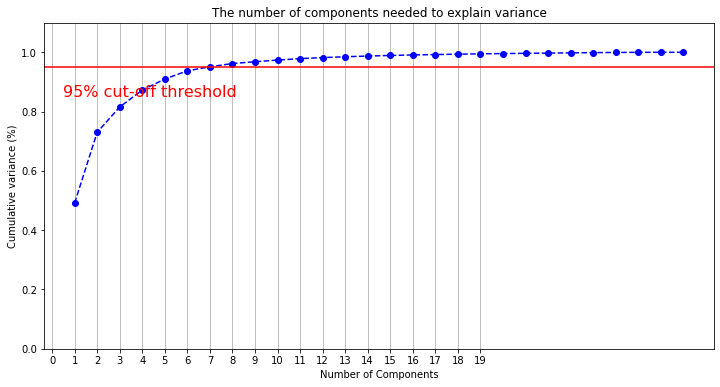

In [35]:
### Find Number of componenets ###
pca = PCA(random_state=0).fit(df_scaled_matrix)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()

xi = np.arange(1, 29, step=1)
#print("xi: ",xi.shape)
y = np.cumsum(pca.explained_variance_ratio_)
#print("y: ",y.shape)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [36]:
### PCA ###
pca = PCA(n_components=20,random_state=0)
x_pca = pca.fit_transform(df_scaled_matrix)
print("Dimensionality Reduced features: ",x_pca.shape)
print("X scaled features: ",df_scaled_matrix.shape)

Dimensionality Reduced features:  (240, 20)
X scaled features:  (240, 28)


([<matplotlib.axis.XTick at 0x17c742ef3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

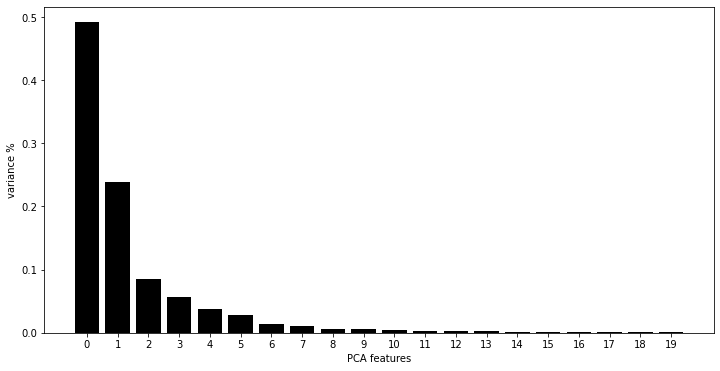

In [37]:
### Plot the explained variances ###
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [38]:
### PCA ###
pca = PCA(n_components=6, random_state=0)
#pca = PCA(n_components = 0.95)
x_pca = pca.fit_transform(df_scaled_matrix)
print("Dimensionality Reduced features: ",x_pca.shape)
print("X scaled features: ",df_scaled_matrix.shape)

Dimensionality Reduced features:  (240, 6)
X scaled features:  (240, 28)


In [39]:
print('Cumulative explained variation for 6 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 6 principal components: 0.9375935886004889


In [40]:
# Save PCA components to a DataFrame
df_pca = pd.DataFrame(x_pca)
pca_matrix = df_pca.values
print("Data type of PCA matrix: ",type(pca_matrix))
print("Shape of PCA matrix: ",pca_matrix.shape)

Data type of PCA matrix:  <class 'numpy.ndarray'>
Shape of PCA matrix:  (240, 6)


In [41]:
### PCA Dataframe ###
df_pca.head()

,0,1,2,3,4,5
0,2.334610,-1.761843,0.776873,0.348227,-0.618542,-0.431504
1,-1.294328,0.467486,0.180933,-0.040108,-0.341124,0.027202
2,-0.528397,-0.315973,-0.177459,-0.958096,0.779780,-0.540005
3,-1.338048,0.462521,0.187292,0.010380,-0.317616,0.024091
4,1.342609,-1.318643,0.184638,-0.411315,-0.563706,-0.599965


Text(0, 0.5, 'PCA 2')

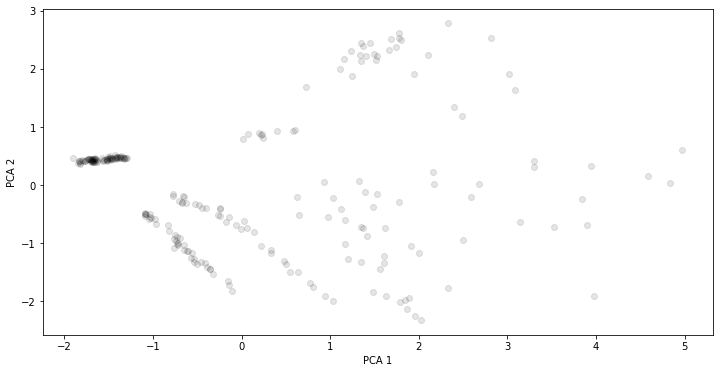

In [42]:
### Component pattern plot ###
plt.scatter(df_pca[0], df_pca[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 4')

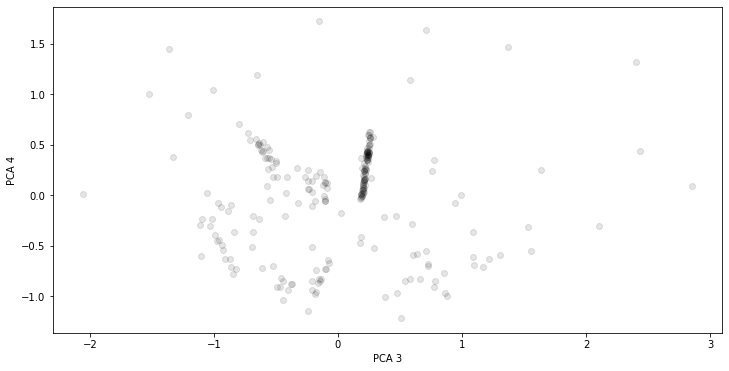

In [43]:
plt.scatter(df_pca[2], df_pca[3], alpha=.1, color='black')
plt.xlabel('PCA 3')
plt.ylabel('PCA 4')

Text(0, 0.5, 'PCA 6')

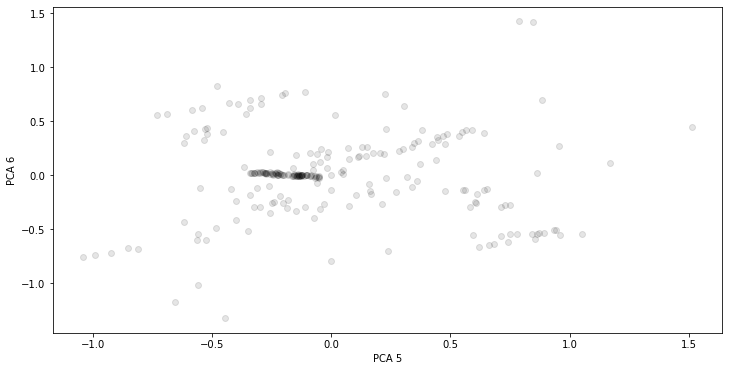

In [44]:
plt.scatter(df_pca[4], df_pca[5], alpha=.1, color='black')
plt.xlabel('PCA 5')
plt.ylabel('PCA 6')

Text(0, 0.5, 'PCA 7')

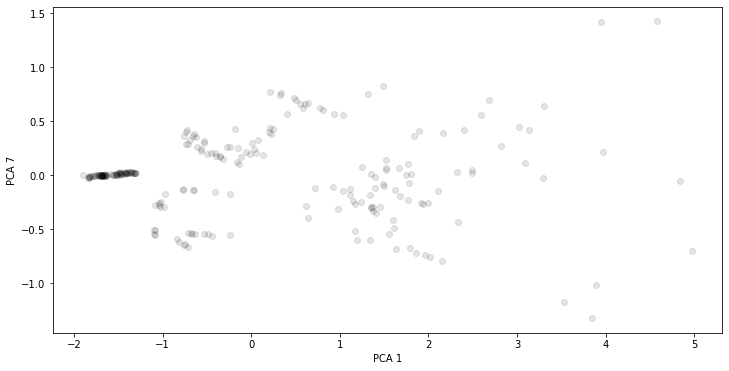

In [45]:
plt.scatter(df_pca[0], df_pca[5], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 7')

Text(0, 0.5, 'PCA 3')

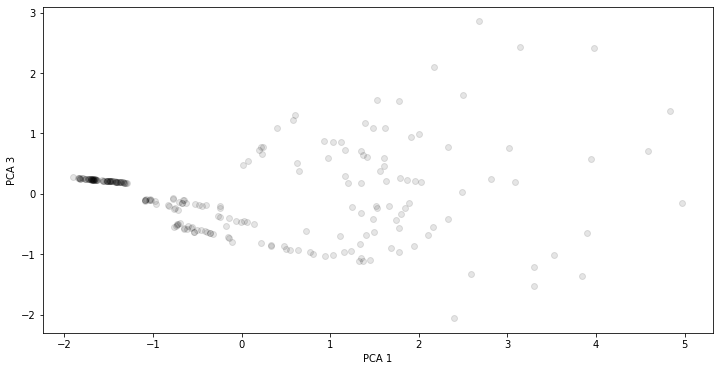

In [46]:
plt.scatter(df_pca[0], df_pca[2], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 3')

Dimensionality reduced dataset:  (240, 2)


C:\Users\d.dasarathan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


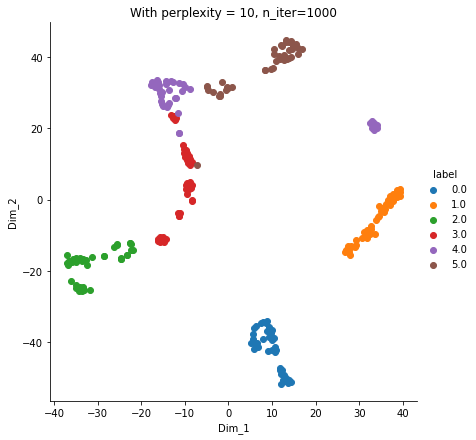

In [47]:

model = TSNE(n_components=2, random_state=0, perplexity=10,  n_iter=1000)
tsne_data_10 = model.fit_transform(df_scaled_matrix)
print("Dimensionality reduced dataset: ",tsne_data_10.shape)
# creating a new data fram which help us in ploting the result data
tsne_data_10 = np.vstack((tsne_data_10.T, data_wt_label['Star type'])).T
tsne_df_10 = pd.DataFrame(data=tsne_data_10, columns=("Dim_1", "Dim_2", "label"))
# Ploting the result of tsne
sns.FacetGrid(tsne_df_10, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 10, n_iter=1000')
plt.show()

Dimensionality reduced dataset:  (240, 2)


C:\Users\d.dasarathan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


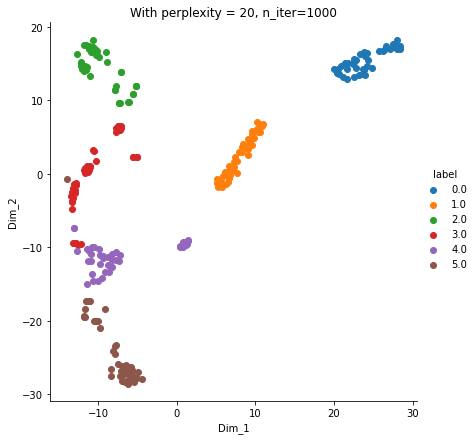

In [48]:
model = TSNE(n_components=2, random_state=0, perplexity=20,  n_iter=1000)
tsne_data_20 = model.fit_transform(df_scaled_matrix)
print("Dimensionality reduced dataset: ",tsne_data_20.shape)
# creating a new data fram which help us in ploting the result data
tsne_data_20 = np.vstack((tsne_data_20.T, data_wt_label['Star type'])).T
tsne_df_20 = pd.DataFrame(data=tsne_data_20, columns=("Dim_1", "Dim_2", "label"))
# Ploting the result of tsne
sns.FacetGrid(tsne_df_20, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 20, n_iter=1000')
plt.show()

Dimensionality reduced dataset:  (240, 2)


C:\Users\d.dasarathan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


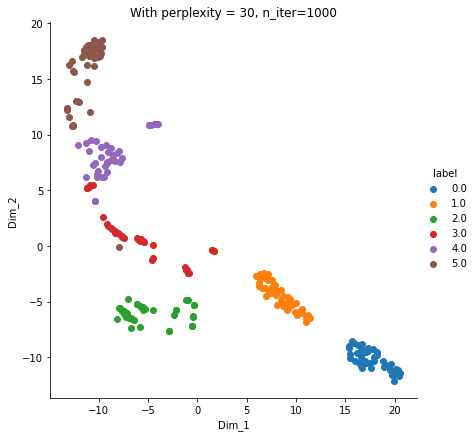

In [49]:
### TSNE ###
model = TSNE(n_components=2, random_state=0, perplexity=30,  n_iter=1000)
tsne_data_30 = model.fit_transform(df_scaled_matrix)
print("Dimensionality reduced dataset: ",tsne_data_30.shape)
# creating a new data fram which help us in ploting the result data
tsne_data_30 = np.vstack((tsne_data_30.T, data_wt_label['Star type'])).T
tsne_df_30 = pd.DataFrame(data=tsne_data_30, columns=("Dim_1", "Dim_2", "label"))
# Ploting the result of tsne
sns.FacetGrid(tsne_df_30, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 30, n_iter=1000')
plt.show()

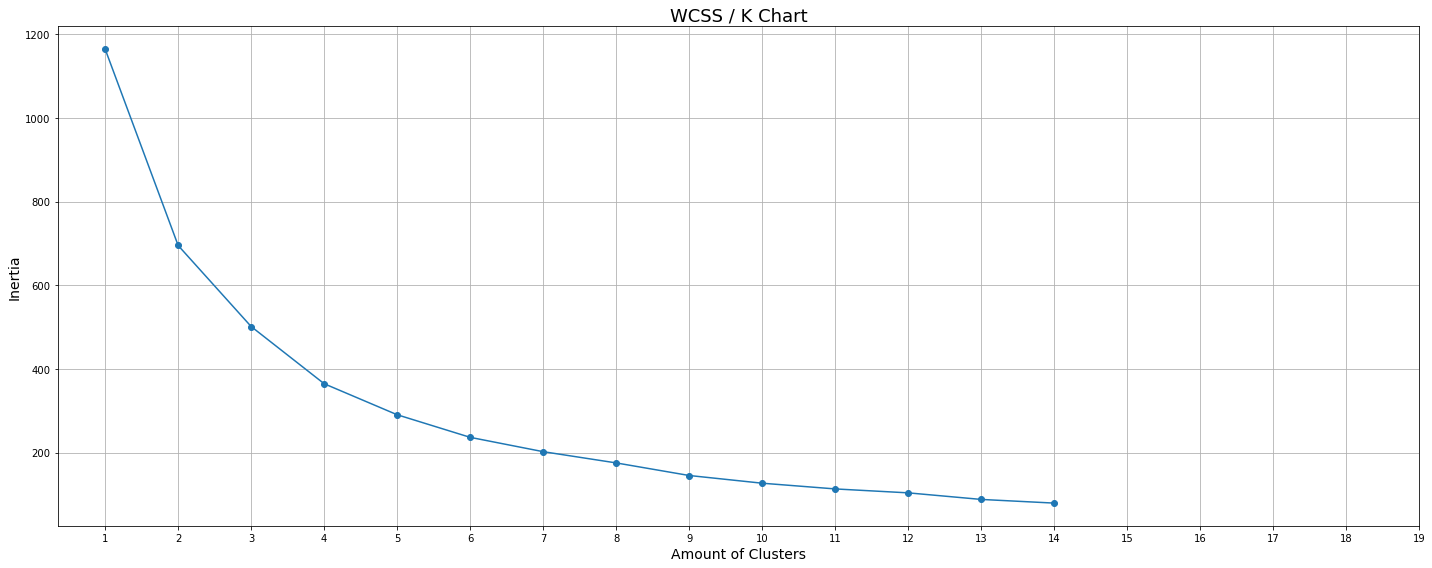

In [50]:
### K-means ###
### Find Clusters (Elbow method) ###
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=600, algorithm ='auto')
    kmeans.fit(pca_matrix)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()
    

In [51]:
### K-Means with 5 clusters ### 
km5 = KMeans(n_clusters=5,random_state=0, max_iter=600, algorithm ='auto')
km5.fit(pca_matrix)
#df_pca['Cluster'] = km5.labels_
km5.labels_

array([2, 0, 3, 0, 2, 2, 3, 2, 3, 0, 0, 3, 3, 3, 4, 0, 0, 1, 2, 0, 4, 4,
       3, 0, 0, 3, 0, 3, 0, 2, 1, 2, 3, 0, 3, 1, 3, 1, 0, 3, 3, 2, 3, 0,
       2, 0, 2, 0, 1, 4, 0, 3, 4, 0, 3, 3, 4, 3, 1, 2, 0, 2, 3, 4, 3, 3,
       0, 3, 0, 0, 0, 2, 0, 3, 1, 0, 3, 2, 2, 3, 0, 0, 0, 2, 3, 2, 2, 0,
       1, 0, 0, 0, 3, 2, 1, 0, 3, 1, 1, 0, 0, 3, 0, 0, 2, 0, 2, 0, 3, 1,
       3, 3, 2, 0, 0, 4, 0, 3, 0, 3, 0, 1, 3, 2, 0, 0, 0, 0, 0, 1, 4, 3,
       2, 3, 2, 2, 1, 0, 3, 3, 0, 2, 0, 3, 1, 3, 3, 3, 0, 2, 0, 3, 1, 0,
       0, 3, 0, 2, 0, 3, 0, 0, 3, 3, 0, 1, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0,
       3, 0, 3, 0, 1, 2, 0, 0, 3, 3, 0, 1, 2, 3, 3, 0, 0, 0, 3, 2, 3, 2,
       3, 3, 3, 3, 1, 2, 3, 4, 1, 0, 0, 3, 1, 3, 4, 0, 0, 3, 2, 3, 2, 1,
       2, 3, 0, 1, 3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 0, 0, 0, 1, 0, 1])

In [52]:
### K-Means with 6 clusters ### 
km6 = KMeans(n_clusters=6, random_state=0, max_iter=600, algorithm ='auto')
km6.fit(pca_matrix)
#df_pca['Cluster'] = km6.labels_
km6.labels_

array([0, 1, 3, 1, 0, 5, 0, 0, 3, 1, 1, 3, 3, 0, 4, 1, 1, 2, 5, 1, 4, 4,
       3, 1, 1, 3, 1, 3, 1, 0, 2, 5, 3, 1, 3, 2, 3, 2, 1, 3, 0, 5, 3, 1,
       0, 1, 5, 1, 2, 4, 1, 3, 4, 1, 3, 3, 4, 3, 2, 5, 1, 0, 3, 4, 3, 0,
       1, 3, 1, 1, 1, 5, 1, 0, 2, 1, 3, 2, 5, 0, 5, 1, 1, 5, 3, 0, 0, 1,
       2, 1, 1, 1, 5, 5, 2, 1, 3, 2, 2, 1, 1, 3, 1, 1, 5, 1, 5, 1, 3, 2,
       0, 3, 0, 5, 1, 4, 1, 3, 1, 3, 1, 2, 3, 5, 5, 1, 1, 1, 1, 2, 4, 3,
       0, 3, 0, 5, 2, 1, 3, 3, 1, 0, 5, 3, 2, 3, 3, 3, 1, 0, 1, 3, 2, 1,
       1, 3, 1, 5, 1, 3, 1, 1, 3, 3, 1, 2, 0, 3, 2, 1, 1, 1, 1, 5, 5, 1,
       3, 1, 3, 1, 2, 5, 1, 1, 3, 3, 1, 2, 5, 3, 0, 1, 1, 1, 3, 5, 3, 0,
       3, 3, 3, 3, 2, 0, 3, 4, 2, 1, 1, 3, 2, 3, 4, 1, 1, 3, 5, 3, 5, 2,
       0, 3, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 1, 5, 1, 1, 1, 2, 5, 2])

In [53]:
df_pca.head()

,0,1,2,3,4,5
0,2.334610,-1.761843,0.776873,0.348227,-0.618542,-0.431504
1,-1.294328,0.467486,0.180933,-0.040108,-0.341124,0.027202
2,-0.528397,-0.315973,-0.177459,-0.958096,0.779780,-0.540005
3,-1.338048,0.462521,0.187292,0.010380,-0.317616,0.024091
4,1.342609,-1.318643,0.184638,-0.411315,-0.563706,-0.599965


For n_clusters = 2 The average silhouette_score is : 0.44145029979844885
For n_clusters = 3 The average silhouette_score is : 0.4492887607206467
For n_clusters = 4 The average silhouette_score is : 0.4818149958288363
For n_clusters = 5 The average silhouette_score is : 0.5107202399706945
For n_clusters = 6 The average silhouette_score is : 0.5277316158554296
For n_clusters = 7 The average silhouette_score is : 0.5283959815661007


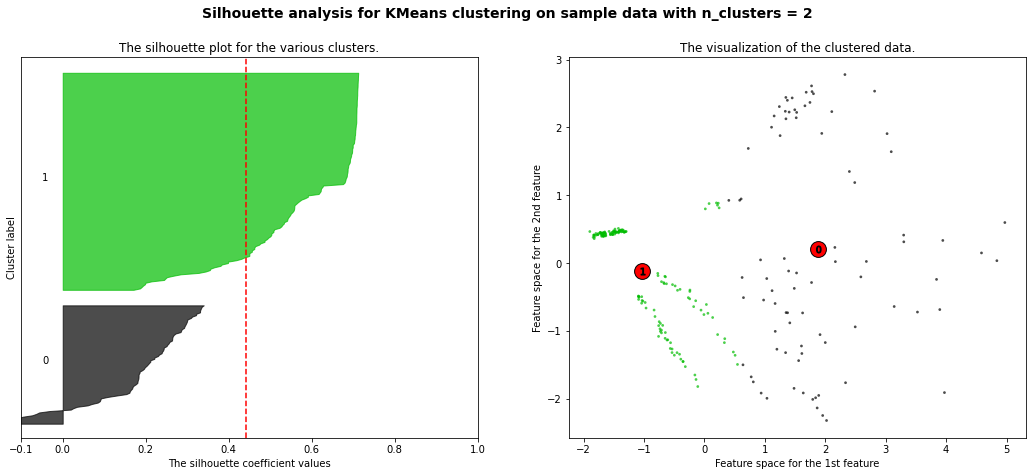

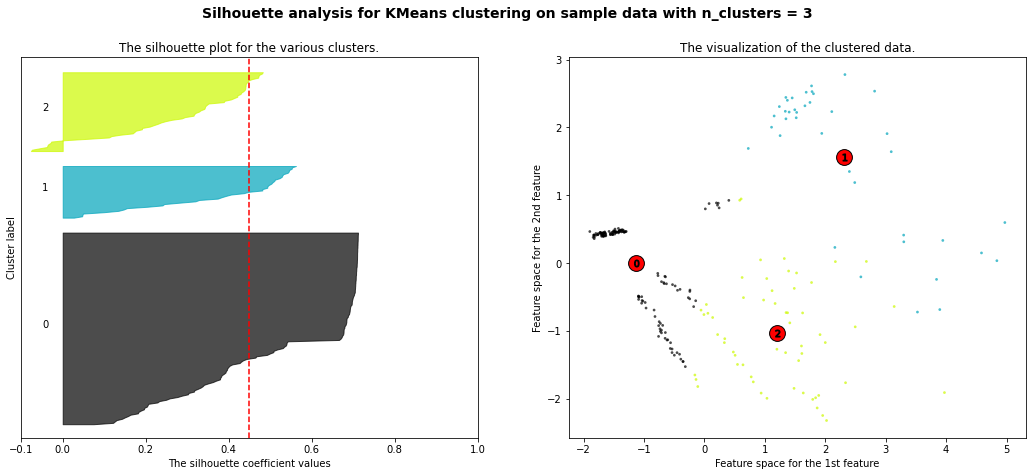

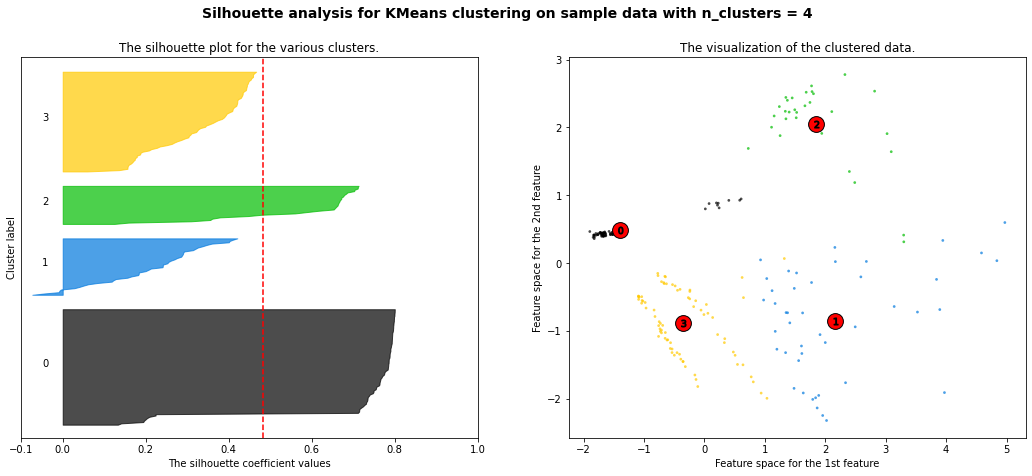

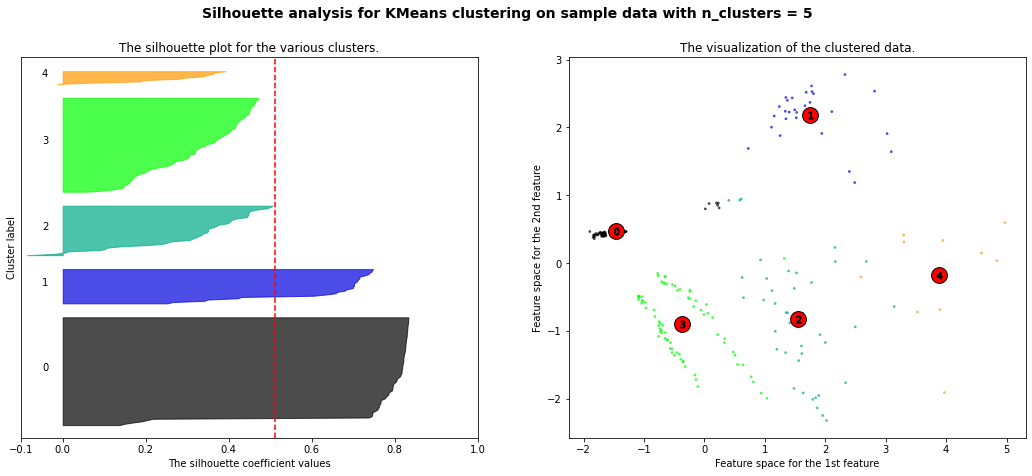

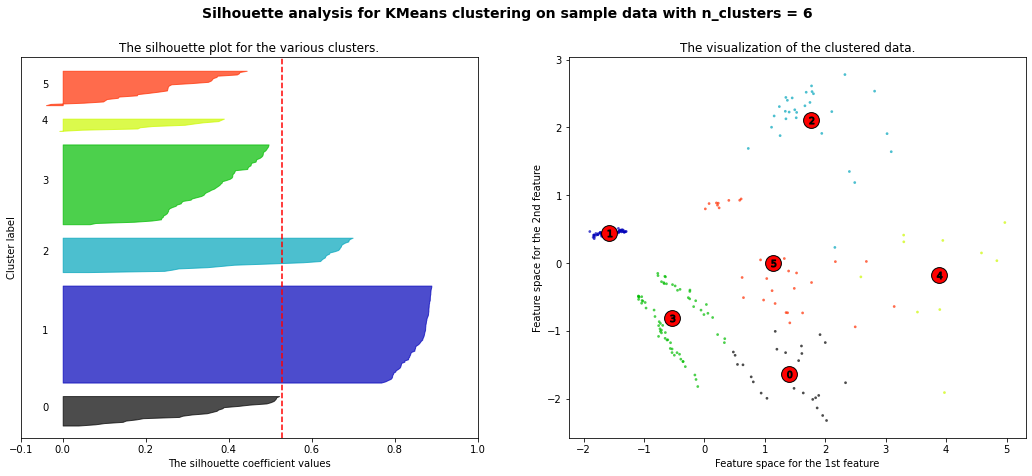

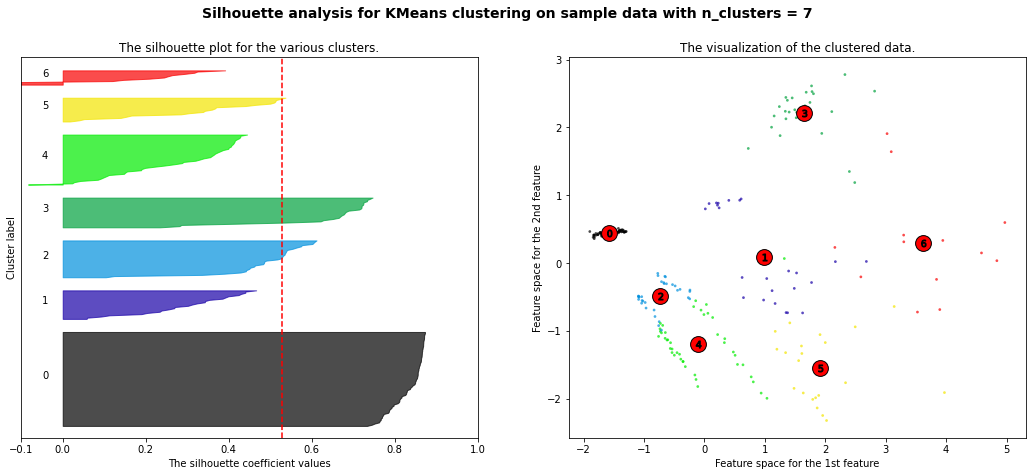

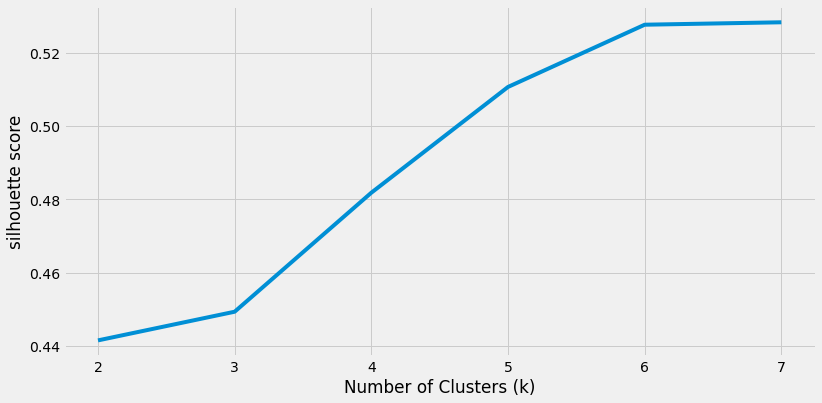

In [54]:
### silhouette analysis ###

range_n_clusters = [2, 3, 4, 5, 6, 7]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0, max_iter=600, algorithm ='auto')
    cluster_labels = clusterer.fit_predict(pca_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c='r', alpha=1, s=250, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [55]:
### K-means with 6 clusters ### 
kmeans = KMeans(n_clusters=6, random_state=0,max_iter=600, algorithm ='auto')
kmeans.fit(pca_matrix)
centroids = kmeans.cluster_centers_
km_labels = kmeans.labels_

correct = 0
for i in range(len(pca_matrix)):
    predict_me = np.array(pca_matrix[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == target[i]:
        correct += 1
print(correct/len(pca_matrix))

0.2833333333333333


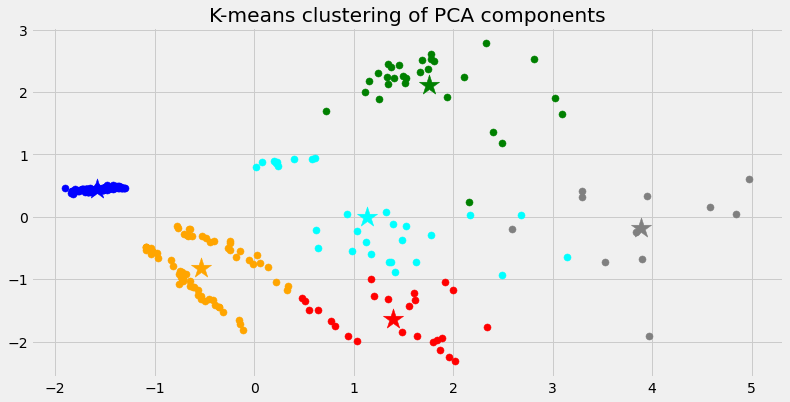

In [56]:
plt.scatter(pca_matrix[km_labels == 0,0], pca_matrix[km_labels == 0,1], s=50, color='red')
plt.scatter(pca_matrix[km_labels == 1,0], pca_matrix[km_labels == 1,1], s=50, color='blue')
plt.scatter(pca_matrix[km_labels == 2,0], pca_matrix[km_labels == 2,1], s=50, color='green')
plt.scatter(pca_matrix[km_labels == 3,0], pca_matrix[km_labels == 3,1], s=50, color='orange')
plt.scatter(pca_matrix[km_labels == 4,0], pca_matrix[km_labels == 4,1], s=50, color='gray')
plt.scatter(pca_matrix[km_labels == 5,0], pca_matrix[km_labels == 5,1], s=50, color='cyan')

plt.scatter(centroids[0][0], centroids[0][1], s=450, marker='*', color='red')
plt.scatter(centroids[1][0], centroids[1][1], s=450, marker='*', color='blue')
plt.scatter(centroids[2][0], centroids[2][1], s=450, marker='*', color='green')
plt.scatter(centroids[3][0], centroids[3][1], s=450, marker='*', color='orange')
plt.scatter(centroids[4][0], centroids[4][1], s=450, marker='*', color='gray')
plt.scatter(centroids[5][0], centroids[5][1], s=450, marker='*', color='cyan')

plt.title('K-means clustering of PCA components')
plt.show()

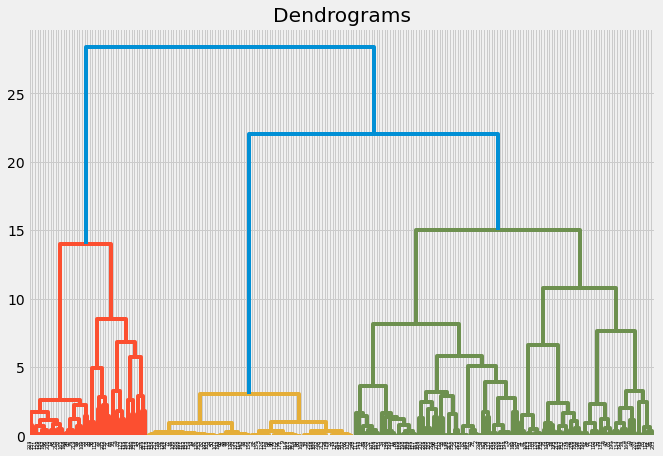

In [57]:
### Dendrograms ###
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled_matrix, method='ward'))

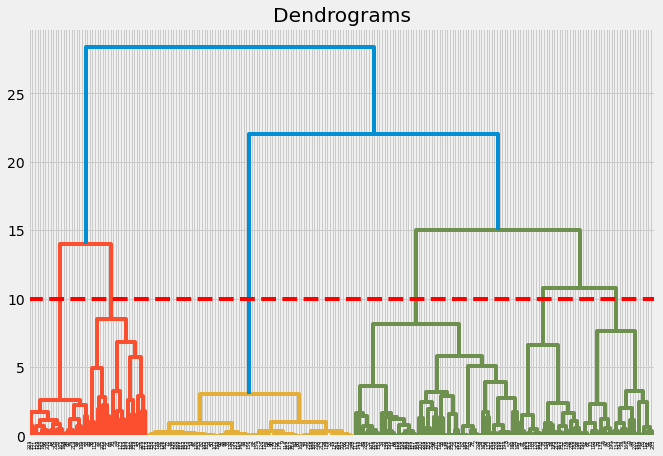

In [58]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled_matrix, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

In [59]:
### Hierarchical clustering ###
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit(df_scaled_matrix)
agg_labels = cluster.labels_

correct = 0
for i in range(len(df_scaled_matrix)):
    if agg_labels[i] == target[i]:
        correct += 1
print(correct/len(pca_matrix))

0.07083333333333333


In [60]:
### Hierarchical clustering of PCA componenets ###
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit(pca_matrix)
agg_labels = cluster.labels_

correct = 0
for i in range(len(pca_matrix)):
    if agg_labels[i] == target[i]:
        correct += 1
print(correct/len(pca_matrix))

0.1


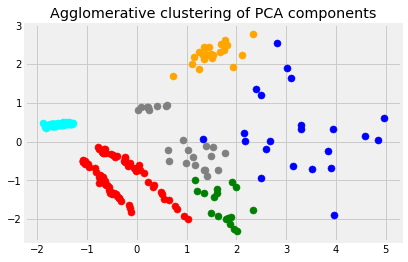

In [64]:
### Agglomerative clustering scatter plot ###
plt.scatter(pca_matrix[agg_labels == 0,0], pca_matrix[agg_labels == 0,1], s=50, color='red')
plt.scatter(pca_matrix[agg_labels == 1,0], pca_matrix[agg_labels == 1,1], s=50, color='blue')
plt.scatter(pca_matrix[agg_labels == 2,0], pca_matrix[agg_labels == 2,1], s=50, color='green')
plt.scatter(pca_matrix[agg_labels == 3,0], pca_matrix[agg_labels == 3,1], s=50, color='orange')
plt.scatter(pca_matrix[agg_labels == 4,0], pca_matrix[agg_labels == 4,1], s=50, color='gray')
plt.scatter(pca_matrix[agg_labels == 5,0], pca_matrix[agg_labels == 5,1], s=50, color='cyan')

plt.title('Agglomerative clustering of PCA components')
plt.show()